In [75]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [76]:
X = iris.data
y = iris.target

###### Import relevant class


In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

print(knn.predict([5, 6, 5, 6]))

# Tuning

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

print(knn.predict([5, 1, 0, 6]))

[2]
[1]


/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


#### Using a different clasification model

In [79]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X, y)

print(logreg.predict([5, 1, 0, 6]))

[2]


/home/vimal/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [80]:
y_predicted = logreg.predict(X)

from sklearn import metrics

print(metrics.accuracy_score(y, y_predicted))

0.96


Do the same with K neighbor classifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)
y_predicted = knn.predict(X)
print(metrics.accuracy_score(y, y_predicted))

0.986666666667


Find accuracy using test/split technique

In [82]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [83]:
y_predicted = logreg.predict(x_test)

print(metrics.accuracy_score(y_test, y_predicted))

0.95


Try the same using KNN


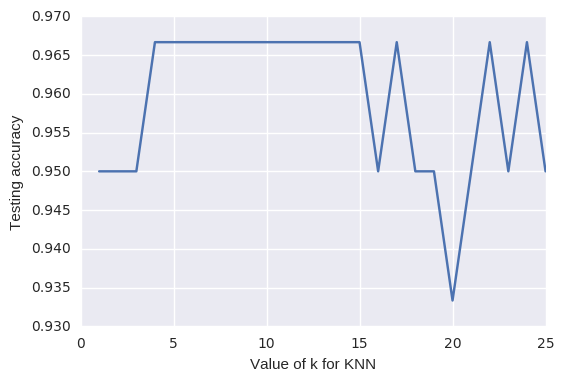

In [84]:
k_range = range(1, 26)
scores = []
for k_value in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(x_train, y_train)
    y_predicted = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_predicted))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

### Let's try regression problem

In [85]:
import pandas as pd

In [86]:
data = pd.read_csv('http://bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [87]:
import seaborn as sns
%matplotlib inline

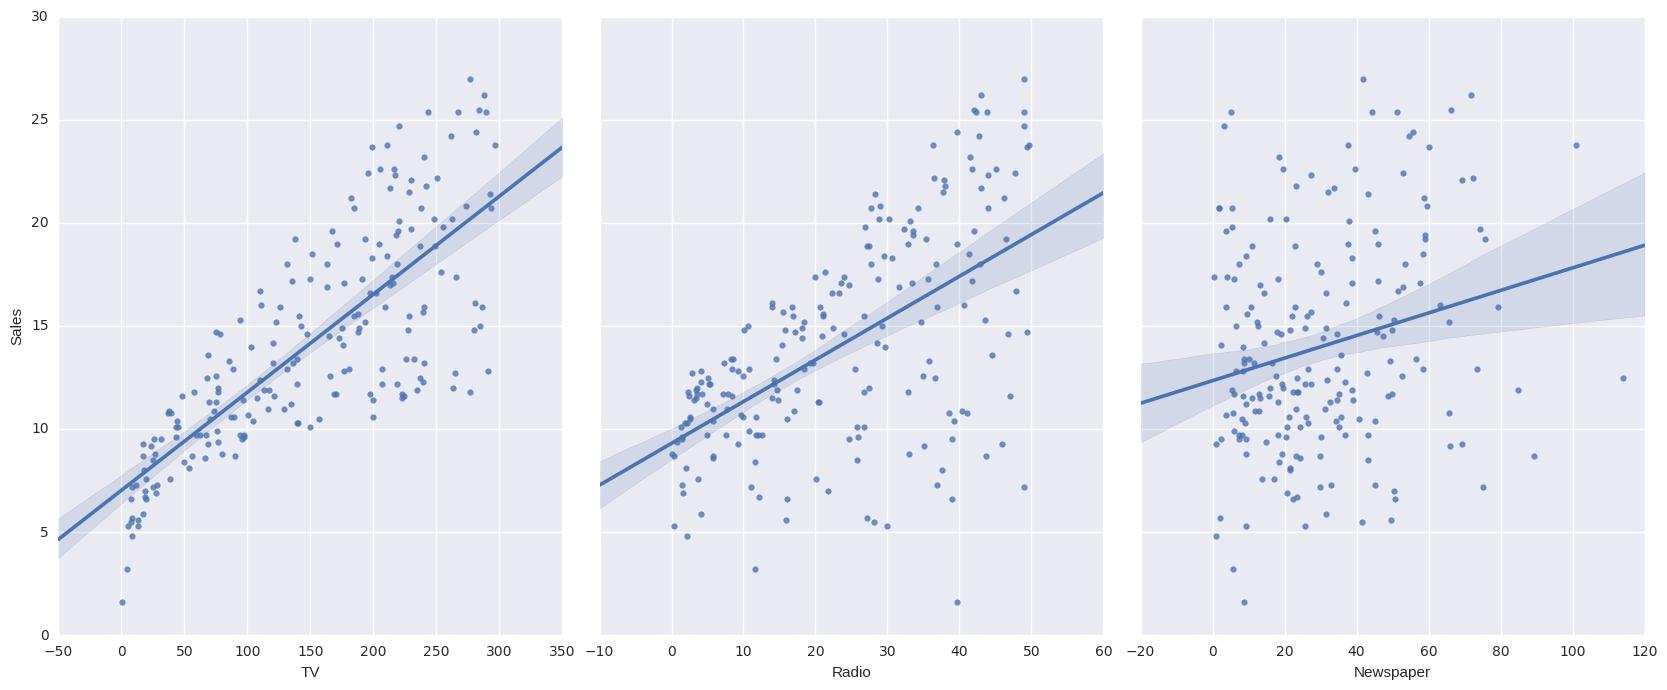

In [88]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], size=7, aspect=0.8, kind='reg')

In [89]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X.head()

y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Use linear regression

In [90]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [91]:
y_predicted = linreg.predict(x_test)

Find Root Mean Square Error value

In [92]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.40465142303


###### Train model without `Newspaper` feature, to acheive more accuracy

In [93]:
X = X.drop('Newspaper', 1)
X.head()
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_predicted = linreg.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.38790346994


Testing accuracy is a high variance estimate, means it changes of each different set of same data set. To overcome we should estimate a model with k-fold cross validation. Scikit learn has function to do k-fold validation, try the same against Iris dataset

In [94]:
from sklearn.cross_validation import cross_val_score

X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.966666666667


[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656]


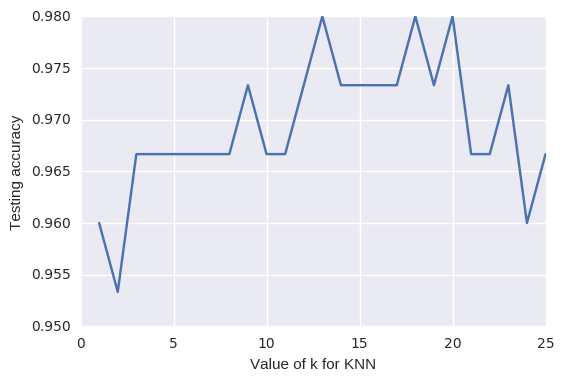

In [95]:
# Find optimal K value
k_range = range(1, 26)
scores = []
for k_value in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_value)    
    scores.append(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print(scores)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

In [96]:
# Choose 18 as optimal K value

knn = KNeighborsClassifier(n_neighbors=18)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.98


In [97]:
# What if I try the same with logistic regression

logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


For this dataset K neighbor classifier model is better than logistic regression

#### Feature selection using cross validation

In [98]:
lr = LinearRegression()

feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data['Sales']
print(np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring='mean_squared_error')).mean())


1.69135317081


In [99]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data['Sales']
print(np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring='mean_squared_error')).mean())

1.67967484191
